http://ataspinar.com/2017/05/26/classification-with-scikit-learn/

In [1]:
import pandas as pd
import os
pd.options.display.max_columns=30

In [2]:
df = pd.read_csv('./clean_state.csv', low_memory=False)
ori = df.copy()
df.shape

(1243807, 24)

In [3]:
df.dtypes

id                  int64
name               object
address            object
city               object
state              object
zip                object
type               object
source             object
association        object
service_type       object
received_time      object
sent_time          object
company            object
status             object
price             float64
campaign           object
is_mobile         float64
landing_page       object
contact_page       object
previous_page      object
inbound_number    float64
call_status        object
duration          float64
job_sold          float64
dtype: object

In [4]:
df = ori.copy()

In [5]:
df.head()

,id,name,address,city,state,zip,type,source,association,service_type,received_time,sent_time,company,status,price,campaign,is_mobile,landing_page,contact_page,previous_page,inbound_number,call_status,duration,job_sold
0,1003609,jason,340 colby lane,ambler,PA,NaN,Supercharged Phone Leads,Organic Search,"Basement Systems, Inc.",Foundation Repair,2007-08-01 08:09:22,2007-08-01 08:09:22,BQ Basement Systems,Billable Lead,100.0,Phone Transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003610,angelique,2820 dudley ave,bronx,NY,10461,Supercharged Phone Leads,Organic Search,"Basement Systems, Inc.",Basement Waterproofing,2007-08-01 08:13:17,2007-08-01 08:13:17,Quality 1st Basement Systems,Billable Lead,100.0,Phone Transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003611,Linda,164 Whiley Road,Groton,MA,01450,Supercharged Web Leads,Organic Search,"Basement Systems, Inc.",Basement Waterproofing,2007-08-01 08:51:41,2007-08-01 08:51:41,Northeast Basement Systems,Billable Lead,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003613,bobby,NaN,durham,NC,NaN,Supercharged Phone Leads,Organic Search,"Basement Systems, Inc.",Basement Waterproofing,2007-08-01 08:10:26,2007-08-01 08:10:26,Regional Waterproofing,Billable Lead,60.0,Phone Transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003614,monica,1611 east elmer rd,east vineland,NJ,NaN,Supercharged Phone Leads,PPC Campaign (clicked on a PPC ad),"Basement Systems, Inc.",Basement Waterproofing,2007-08-01 09:31:39,2007-08-01 09:31:39,Dry Guys Basement Systems,Billable Lead,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
ck_null = lambda fd: (df[fd].isnull()).sum()
ck_count = lambda fd: df[fd].value_counts().head(10)

In [7]:
for i in df:
    m, n = ck_null(i), df.shape[0]
    print  str(m).ljust(8), n, str(round(m/float(n),4)*100).ljust(5)+' %', i

0        1243807 0.0   % id
3284     1243807 0.26  % name
68868    1243807 5.54  % address
3134     1243807 0.25  % city
0        1243807 0.0   % state
43797    1243807 3.52  % zip
0        1243807 0.0   % type
4        1243807 0.0   % source
367      1243807 0.03  % association
7111     1243807 0.57  % service_type
0        1243807 0.0   % received_time
0        1243807 0.0   % sent_time
172      1243807 0.01  % company
0        1243807 0.0   % status
0        1243807 0.0   % price
939164   1243807 75.51 % campaign
978626   1243807 78.68 % is_mobile
461169   1243807 37.08 % landing_page
613968   1243807 49.36 % contact_page
654039   1243807 52.58 % previous_page
699281   1243807 56.22 % inbound_number
699281   1243807 56.22 % call_status
699281   1243807 56.22 % duration
1221674  1243807 98.22 % job_sold


In [8]:
df = df.fillna('No Data')

In [9]:
df.columns

Index([u'id', u'name', u'address', u'city', u'state', u'zip', u'type',
       u'source', u'association', u'service_type', u'received_time',
       u'sent_time', u'company', u'status', u'price', u'campaign',
       u'is_mobile', u'landing_page', u'contact_page', u'previous_page',
       u'inbound_number', u'call_status', u'duration', u'job_sold'],
      dtype='object')

In [10]:
ck_count('status')

Billable Lead    825202
No Charge        418605
Name: status, dtype: int64

In [11]:
df[df['status']!='Billable Lead']['price'].value_counts()

0.0      416926
90.0        572
100.0       289
120.0       270
60.0        250
75.0        205
50.0         69
80.0          7
85.0          4
35.0          3
130.0         3
200.0         2
150.0         2
30.0          2
125.0         1
Name: price, dtype: int64

In [12]:
# (df['received_time'].isnull()).sum()
# df['zip'].value_counts()
# df['company'].value_counts()
# df['contact_page'].value_counts()

In [13]:
pd.Timestamp(df['sent_time'][0])

Timestamp('2007-08-01 08:09:22')

In [14]:
df['sent_time'][0]

'2007-08-01 08:09:22'

In [15]:
def dm(x):
    try:
        return pd.Timestamp(x)
    except:
        print x
        return x

In [16]:
df['month']=df['sent_time'].apply(lambda x:x.split('-')[1])
df['day']=df['sent_time'].apply(lambda x:x.split('-')[2][:2])
df['hour']=df['sent_time'].apply(lambda x:x.split(' ')[-1][:2])
df.shape

(1243807, 27)

In [20]:
df[['sent_time','month','day','hour']].head()

,sent_time,month,day,hour
0,2007-08-01 08:09:22,08,01,08
1,2007-08-01 08:13:17,08,01,08
2,2007-08-01 08:51:41,08,01,08
3,2007-08-01 08:10:26,08,01,08
4,2007-08-01 09:31:39,08,01,09


In [17]:
# ck_count('day')

In [18]:
# df['time']=df['sent_time'].apply(dm)
# df.shape

In [19]:
df.columns

Index([u'id', u'name', u'address', u'city', u'state', u'zip', u'type',
       u'source', u'association', u'service_type', u'received_time',
       u'sent_time', u'company', u'status', u'price', u'campaign',
       u'is_mobile', u'landing_page', u'contact_page', u'previous_page',
       u'inbound_number', u'call_status', u'duration', u'job_sold', u'month',
       u'day', u'hour'],
      dtype='object')

In [20]:
df= df.drop(['id','price', 'name', 'address', 'sent_time', 
             'sent_time', 'received_time', 'duration', 'job_sold', 'inbound_number'], axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb = LabelEncoder()
lb

LabelEncoder()

In [23]:
lb.fit_transform(df['company'])

array([ 86, 620, 551, ..., 623, 706,  12])

In [24]:
lb.inverse_transform(1)

'4th Dimension Concepts'

In [25]:
%%time
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed
 
to_be_encoded_cols = df.columns.values
label_encode(df, to_be_encoded_cols)

CPU times: user 46.1 s, sys: 9.72 s, total: 55.8 s
Wall time: 56.6 s


In [28]:
df.head()

,city,state,zip,type,source,association,service_type,company,status,campaign,is_mobile,landing_page,contact_page,previous_page,call_status,month,day,hour
0,43379,44,71023,0,9,0,79,86,0,30,2,0,0,0,1,8,1,8
1,44269,39,4182,0,9,0,23,620,0,30,2,0,0,0,1,8,1,8
2,15030,21,886,1,9,0,23,551,0,25,2,0,0,0,1,8,1,8
3,45713,31,71023,0,9,0,23,639,0,30,2,0,0,0,1,8,1,8
4,45853,35,71023,0,13,0,23,299,0,25,2,0,0,0,1,8,1,9


In [29]:
mark = df.pop('status')
mark.shape

(1243807,)

In [21]:
# df0 = df.iloc[:1000,:]
# y0 = mark.iloc[:1000]
# df1 = df.iloc[1000:1500]
# y1 = mark.iloc[1000:1500]
# dim = lambda *x: [i.shape for i in x]

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df, mark, test_size=0.33, random_state=0)
dim(X_train, X_test, y_train, y_test)

[(833350, 17), (410457, 17), (833350,), (410457,)]

In [47]:
%%time
rf.fit(X_train, y_train)
rf

CPU times: user 18.6 s, sys: 12 ms, total: 18.6 s
Wall time: 18.6 s


In [49]:
pred = rf.predict(X_test)
print pred.shape
pred[:3]

(410457,)


array([0, 1, 0])

In [50]:
accuracy_score(y_test, pred)

0.81246513033033907

In [51]:
rf.feature_importances_

array([ 0.08517409,  0.03398321,  0.12324019,  0.00528384,  0.2388073 ,
        0.02847621,  0.03817958,  0.05289795,  0.0232979 ,  0.01205855,
        0.06506423,  0.02293109,  0.02960988,  0.01044494,  0.06739652,
        0.08914472,  0.0740098 ])

In [52]:
forest = rf

In [53]:
import numpy as np
import matplotlib.pyplot as plt
X=X_train

In [54]:
X.columns[3]

'type'

In [55]:
# plt.bar?

In [58]:
# indices

In [60]:
# list(X.columns[indices])

In [61]:
# plt.barh?

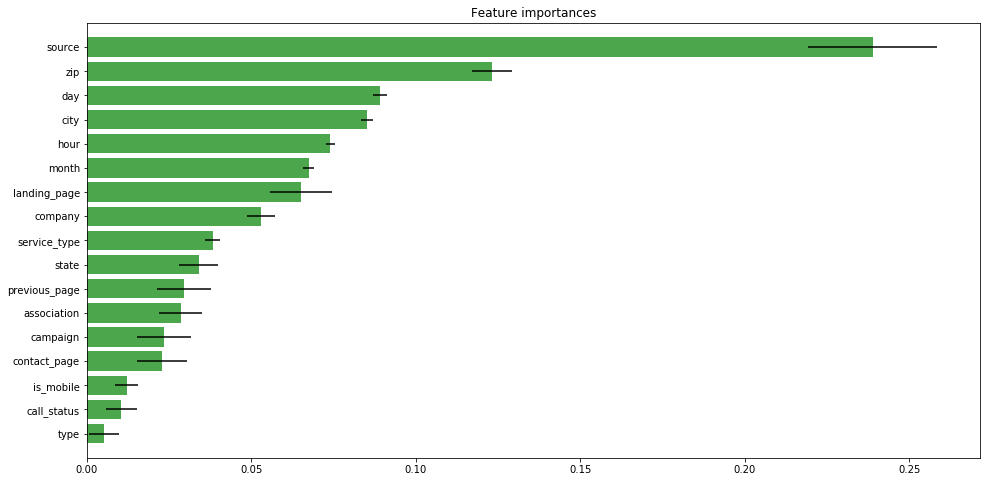

Feature ranking:
1. feature source (0.238807)
2. feature zip (0.123240)
3. feature day (0.089145)
4. feature city (0.085174)
5. feature hour (0.074010)
6. feature month (0.067397)
7. feature landing_page (0.065064)
8. feature company (0.052898)
9. feature service_type (0.038180)
10. feature state (0.033983)
11. feature previous_page (0.029610)
12. feature association (0.028476)
13. feature campaign (0.023298)
14. feature contact_page (0.022931)
15. feature is_mobile (0.012059)
16. feature call_status (0.010445)
17. feature type (0.005284)


In [63]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="g", xerr=std[indices], 
        align="center", alpha=.7)

plt.yticks(range(X.shape[1]), list(X.columns[indices]))
plt.ylim([-1, X.shape[1]])

plt.gca().invert_yaxis()

plt.show()

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

### cross validation

In [65]:
cross_val_score(rf, df.values, mark.values, cv=5)

array([ 0.80045586,  0.73812721,  0.78222471,  0.71689694,  0.66641877])

In [66]:
rf.predict_proba(X_test)

array([[ 1. ,  0. ],
       [ 0.2,  0.8],
       [ 0.7,  0.3],
       ..., 
       [ 0.9,  0.1],
       [ 0.7,  0.3],
       [ 0.9,  0.1]])